In [1]:
import utils as utils
from nltk.classify import NaiveBayesClassifier

In [2]:
DATA_FILE_PATH = 'data.json'

In [3]:
train_tups, test_tups = utils.split_data(utils.generate_tuples_from_file(DATA_FILE_PATH, num_samples=10000), test_size=0.2)

print('Training set size: ', len(train_tups[0]))
print('Test set size: ', len(test_tups[0]))
print('Sample tokenized review: ', train_tups[0][0])
print('Sample rating: ', train_tups[1][0])

Training set size:  8000
Test set size:  2000
Sample tokenized review:  ['Leslie', 'is', 'outstanding', '.', 'A', 'colleague', 'recommended', 'her', 'to', 'me', 'over', 'a', 'year', 'ago', 'and', 'we', "'ve", 'never', 'looked', 'back', '.', 'We', "'d", 'tried', 'a', 'couple', 'other', 'services', 'in', 'the', 'past', ',', 'but', 'never', 'quite', 'found', 'the', 'right', 'fit', '.', 'Brooms', 'N', 'Buckets', 'is', 'professional', ',', 'thorough', ',', 'wonderfully', 'friendly', 'and', 'everything', 'I', "'d", 'been', 'looking', 'for', '.']
Sample rating:  5


In [4]:
def word_feats(list_of_words) -> dict:    
    return dict([(word, True) for word in list_of_words])

def word_feats_mult(list_of_words) -> dict:
    return dict([(word, list_of_words.count(word)) for word in list_of_words])

In [5]:
labeled_feature_sets = []
for i in range(len(train_tups[0])):
    feature_set = word_feats(train_tups[0][i])
    _class = train_tups[1][i]
    labeled_feature_sets.append((feature_set, _class))

classifier = NaiveBayesClassifier.train(labeled_featuresets=labeled_feature_sets)

In [6]:
unseen_review = word_feats('The food was absolutely terrible. I would never eat there.')
rating_prediction = classifier.classify(unseen_review)

print('Rating prediction: ', rating_prediction)

Rating prediction:  1


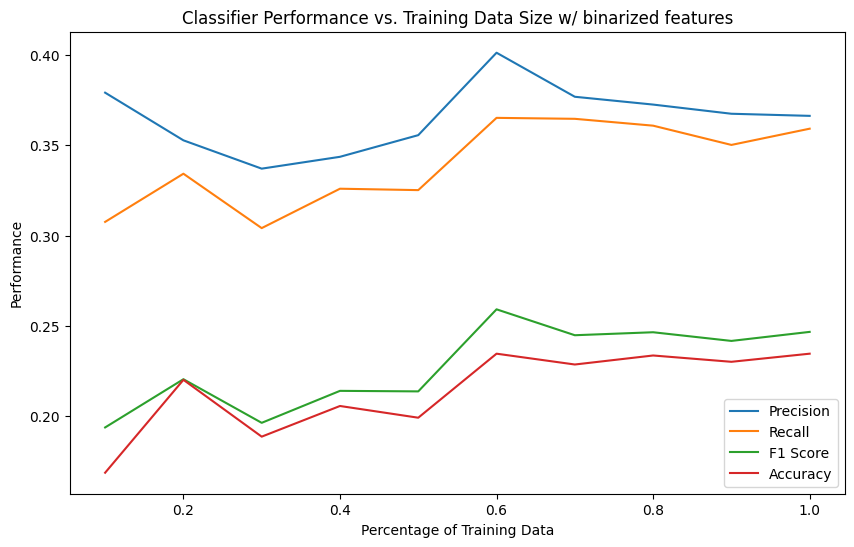

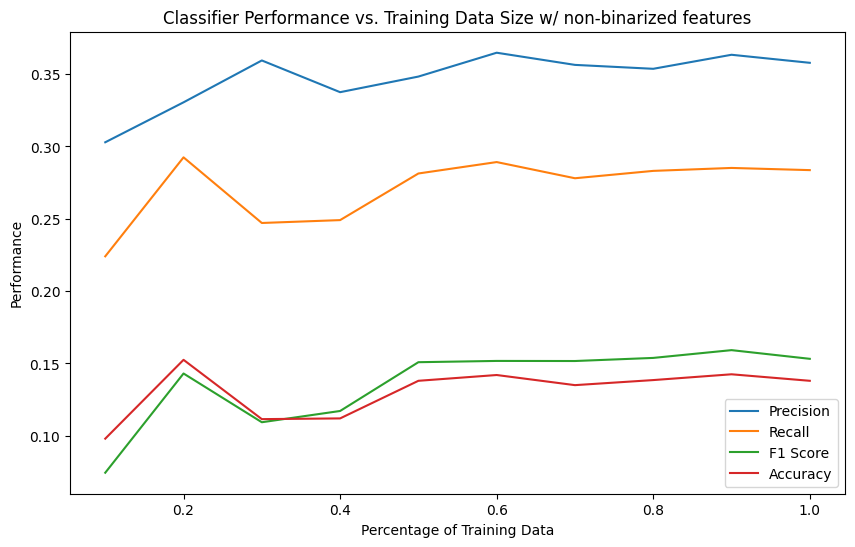

In [8]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

# takes approximately 3.5sec to run on Felix's computer

import uuid
import matplotlib.pyplot as plt
import random


def graph(word_featurizer, save=False, word_featurizer_variation=None):
    percentages = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracies = []

    for i in range(10, 101, 10):
        percentage = i / 100
        percentages.append(percentage)

        sample_size = len(labeled_feature_sets) * percentage
        sampled_elements = random.sample(labeled_feature_sets, int(sample_size))

        classifier = NaiveBayesClassifier.train(labeled_featuresets=sampled_elements)

        dev_y = []
        dev_pred = []
        for i in range(len(test_tups[0])):
            dev_y.append(test_tups[1][i])
            dev_pred.append(classifier.classify(word_featurizer(test_tups[0][i])))

        scores = utils.get_prfa(dev_y, dev_pred)

        precisions.append(scores[0])
        recalls.append(scores[1])
        f1_scores.append(scores[2])
        accuracies.append(scores[3])

    # Create a graph
    plt.figure(figsize=(10, 6))
    plt.plot(percentages, precisions, label='Precision')
    plt.plot(percentages, recalls, label='Recall')
    plt.plot(percentages, f1_scores, label='F1 Score')
    plt.plot(percentages, accuracies, label='Accuracy')

    plt.title(f"Classifier Performance vs. Training Data Size w/ {word_featurizer_variation} features")
    plt.xlabel("Percentage of Training Data")
    plt.ylabel("Performance")
    plt.legend()


    if save:
        plt.savefig(f"naive_bayes_{word_featurizer_variation}.png")

    plt.show()

graph(word_feats, save=True, word_featurizer_variation="binarized")
graph(word_feats_mult, save=True, word_featurizer_variation="non-binarized")